First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

After imputing missing values in SepalLengthCm:
0    5.877241
1    5.877241
2    5.877241
3    5.877241
4    5.877241
Name: SepalLengthCm, dtype: float64

Kurtosis and Skewness of numerical variables:
Id - Kurtosis: -1.200106671407618, Skewness: 0.0
SepalLengthCm - Kurtosis: -0.4562884582724376, Skewness: 0.27797389018543245
SepalWidthCm - Kurtosi

/var/folders/k8/kqryznrj71nf338_z3cghhym0000gn/T/ipykernel_43467/485168074.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean(), inplace=True)


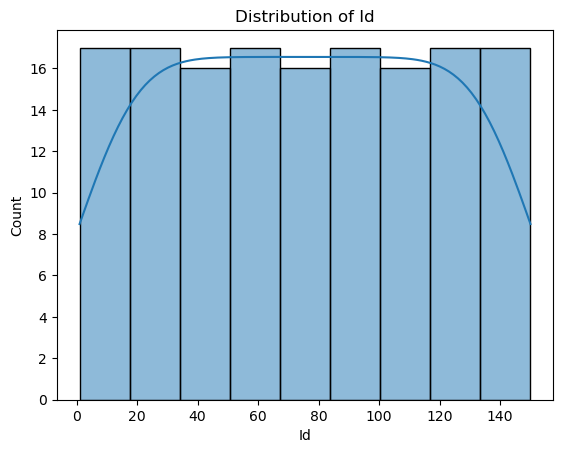

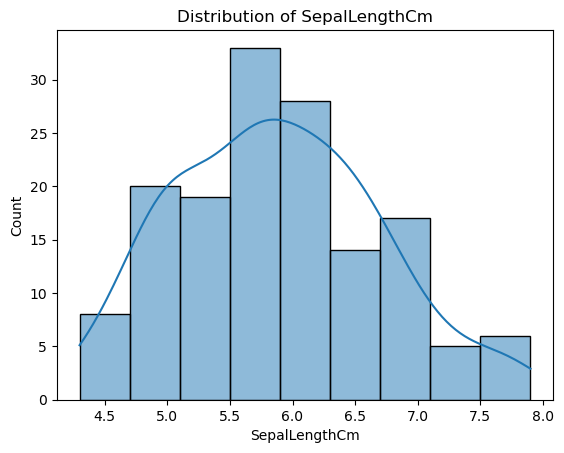

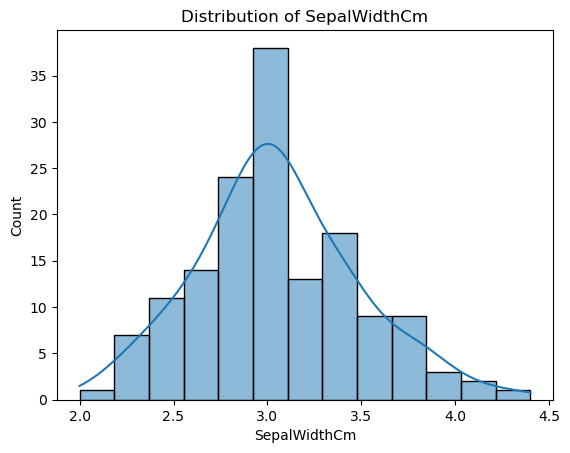

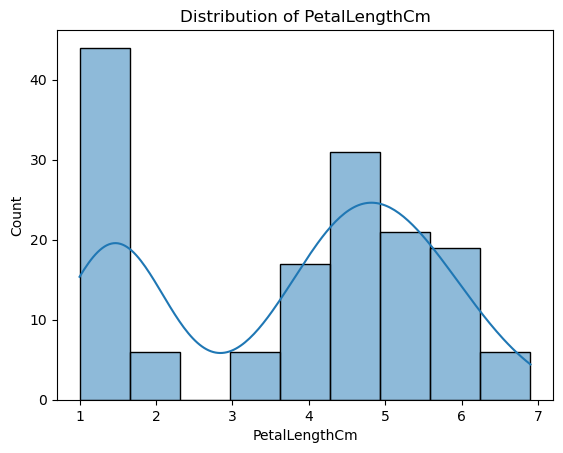

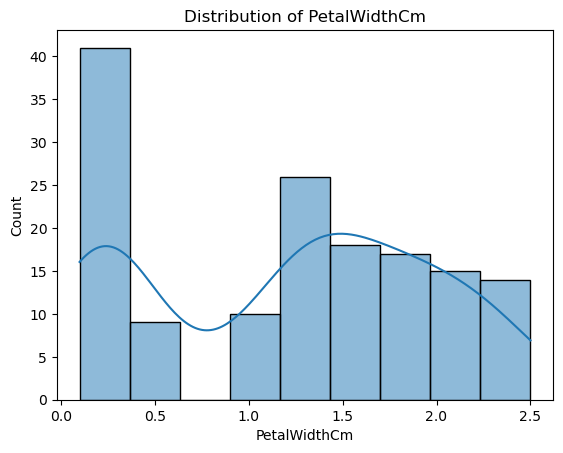


Log transformation of numerical columns:


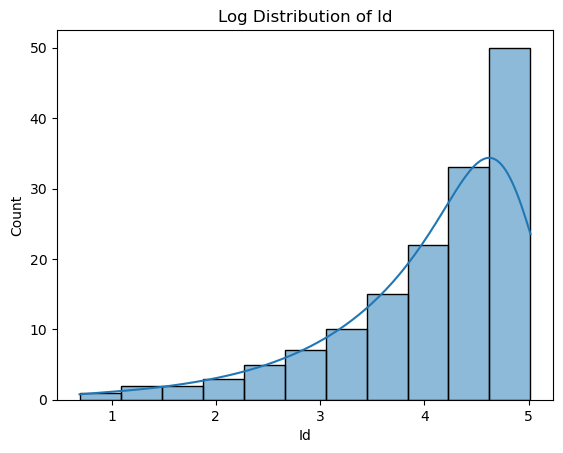

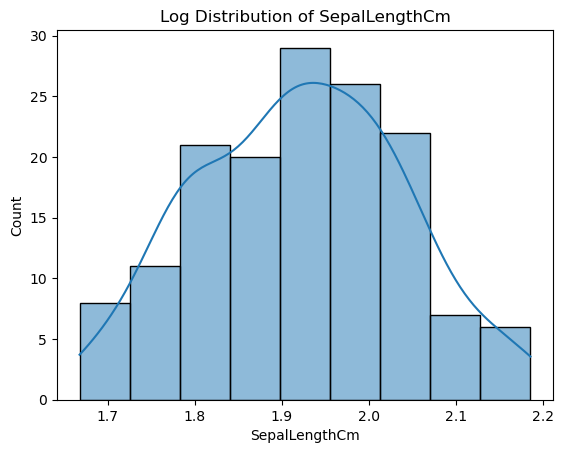

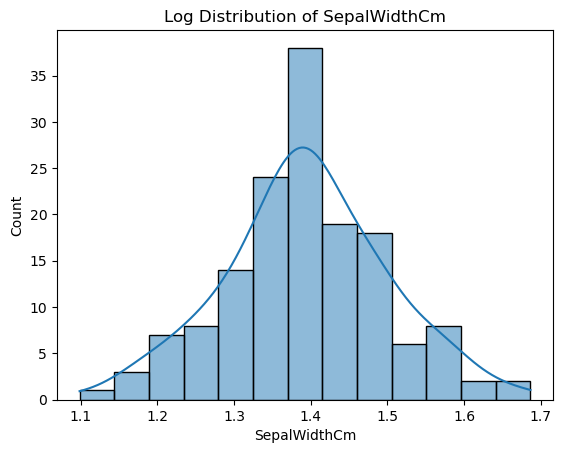

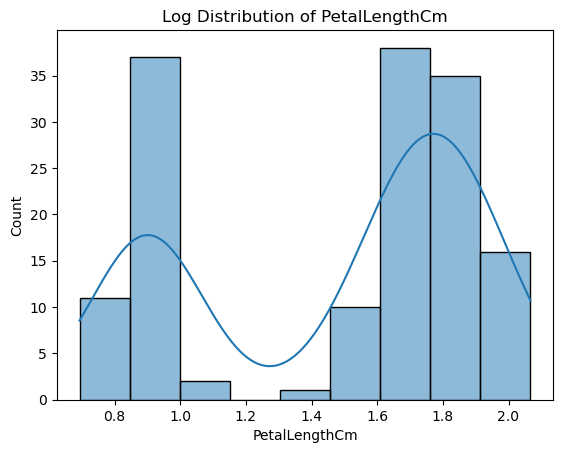

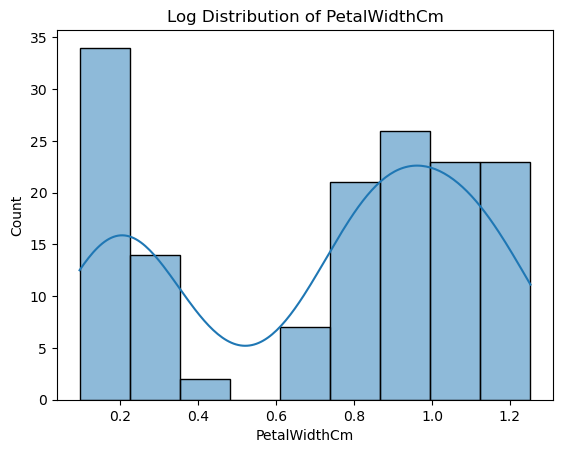


Normality test using D’Agostino and Pearson’s test:
Id: Statistics=62.152, p=0.000 -> Not normal
SepalLengthCm: Statistics=3.602, p=0.165 -> Normal
SepalWidthCm: Statistics=3.577, p=0.167 -> Normal
PetalLengthCm: Statistics=221.332, p=0.000 -> Not normal
PetalWidthCm: Statistics=136.777, p=0.000 -> Not normal

Correlation matrix:


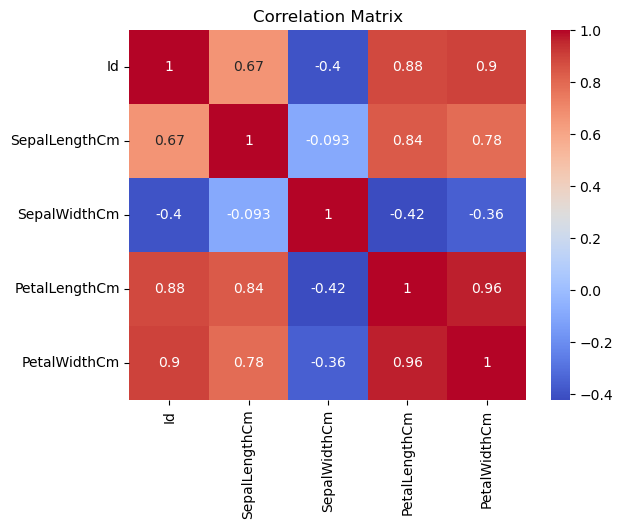


Data split sizes:
Train: 104
Validation: 23
Test: 23


In [2]:
# ---------------------- 1. Data Exploration & Visualization ----------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, normaltest
from sklearn.model_selection import train_test_split

# Step 1: Read the CSV file
df = pd.read_csv('/users/devansh/downloads/Iris.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 3: Impute missing values (simulate by assigning NaNs to a column)
# Just for demonstration: let's assume SepalLengthCm has some missing values
df.loc[0:4, 'SepalLengthCm'] = np.nan
df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean(), inplace=True)
print("\nAfter imputing missing values in SepalLengthCm:")
print(df['SepalLengthCm'].head())

# Step 4: Compute kurtosis and skewness
print("\nKurtosis and Skewness of numerical variables:")
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"{col} - Kurtosis: {kurtosis(df[col])}, Skewness: {skew(df[col])}")

# Step 5: Summary statistics
print("\nSummary statistics of numerical variables:")
print(df.describe())

# Step 6: Distribution plots
print("\nDistribution plots:")
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Step 7: Natural log transformation
print("\nLog transformation of numerical columns:")
df_log = df.copy()
for col in numerical_cols:
    df_log[col] = np.log(df[col] + 1)  # Add 1 to avoid log(0)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Log Distribution of {col}')
    plt.show()

# Step 8: Normality test
print("\nNormality test using D’Agostino and Pearson’s test:")
for col in numerical_cols:
    stat, p = normaltest(df[col])
    print(f"{col}: Statistics={stat:.3f}, p={p:.3f} -> {'Normal' if p > 0.05 else 'Not normal'}")

# Step 9: Correlation matrix and heatmap
print("\nCorrelation matrix:")
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 10: Split the dataset (70-15-15)
train_val, test = train_test_split(df, test_size=0.15, random_state=42)
train, val = train_test_split(train_val, test_size=0.1765, random_state=42)  # 0.1765 * 85% ≈ 15%

print(f"\nData split sizes:\nTrain: {len(train)}\nValidation: {len(val)}\nTest: {len(test)}")




Data Description:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Data Types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Predicted vs Actual values:
     Actual  Predicted
73      4.7   4.129080
18      1.7   1.877758
118     6.9   7.029104

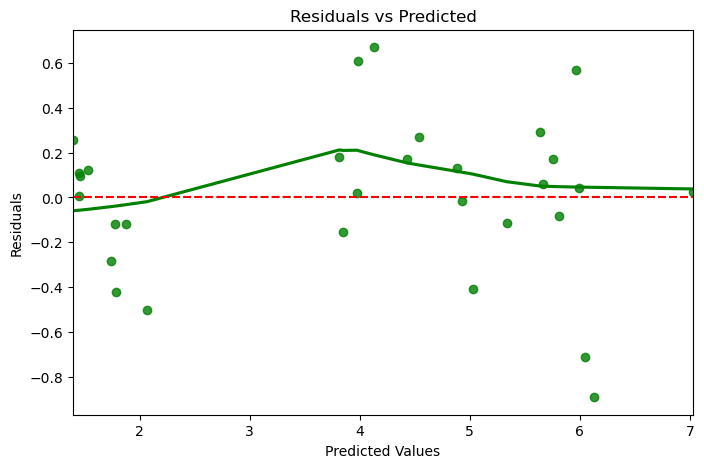


Model Performance:
Mean Squared Error (MSE): 0.130
Root Mean Squared Error (RMSE): 0.360
R² Score: 0.960


In [6]:
# ---------------------- 2. Linear Regression Model ----------------------
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Read the dataset
df = pd.read_csv('/users/devansh/downloads/Iris.csv')

# Step 2: Describe the data
print("\nData Description:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Drop non-numeric and ID column
df = df.drop(columns=['Id', 'Species'])  # Target here is PetalLengthCm

# Step 3: Define features and target
X = df.drop(columns=['PetalLengthCm'])  # Independent variables
y = df['PetalLengthCm']                 # Dependent variable (response)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and analyze results
y_pred = model.predict(X_test)
print("\nPredicted vs Actual values:")
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred_df.head())

# Step 7: Compute residuals and plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Step 8: Performance evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")





Accuracy Score: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


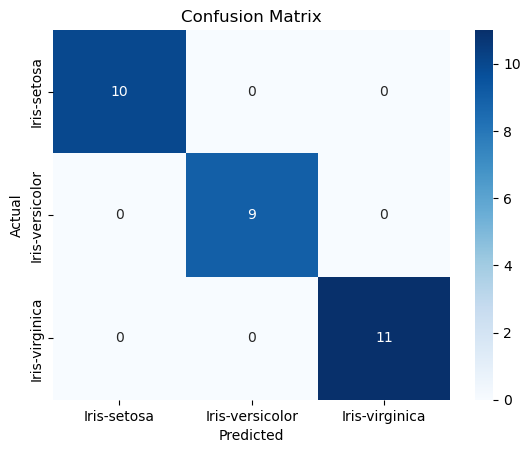

In [7]:
# ---------------------- 3. Logistic Regression Model ----------------------

# ● Read the dataset.
# ● Build a logistic regression model using Python and predict on your test dataset.
# ● Develop some metrics to determine the performance of your classification model.

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the dataset
df = pd.read_csv('/users/devansh/downloads/Iris.csv')

# Step 2: Prepare features and target
X = df.drop(columns=['Id', 'Species'])  # Independent variables
y = df['Species']                       # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build logistic regression model (multinomial)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



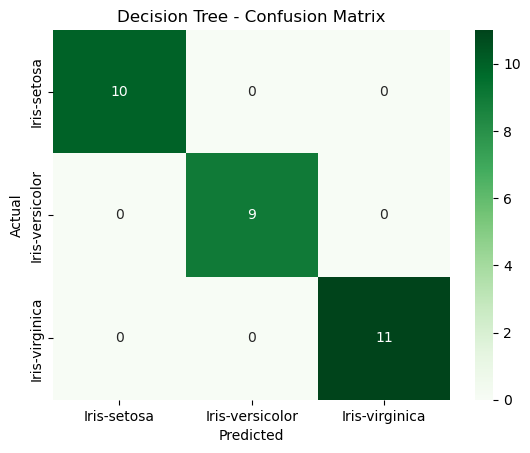

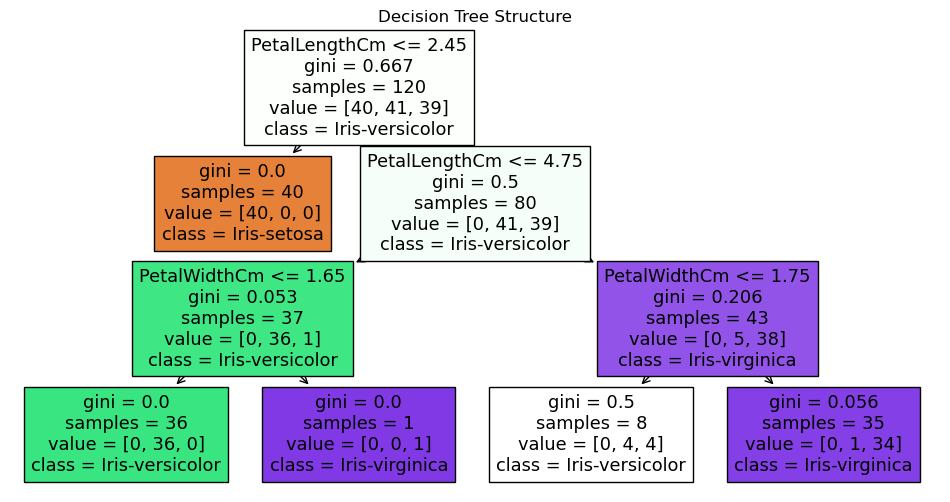

In [8]:
# ---------------------- 4. Decision Tree Model ----------------------

# ● Build a Decision Tree model on a dataset of your choice.
# ● Check for the performance of the model.
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the dataset
df = pd.read_csv('/users/devansh/downloads/Iris.csv')

# Step 2: Prepare features and target
X = df.drop(columns=['Id', 'Species'])  # Feature variables
y = df['Species']                       # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='d',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree Structure")
plt.show()



Silhouette Score: 0.479


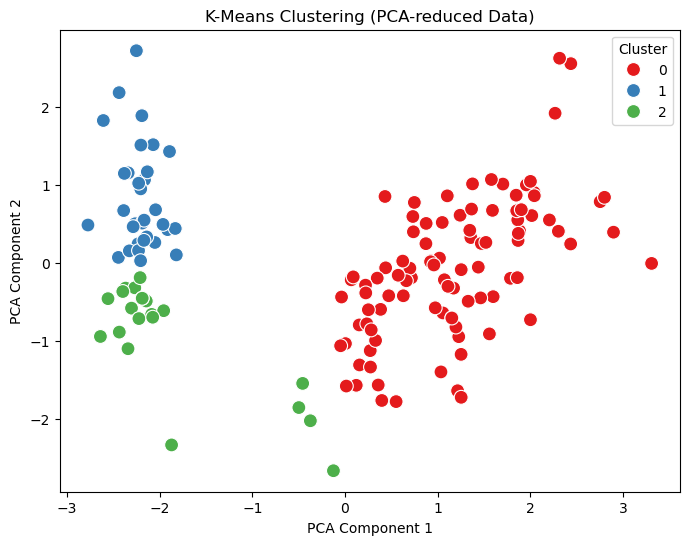

In [10]:
# ---------------------- 5. K-Means Clustering Model ----------------------

# ● Build a K-Means clustering model on a dataset of your choice.
# ● Check for the performance of the model.
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv('/users/devansh/downloads/Iris.csv')

# Step 2: Prepare features (drop Id and target 'Species')
X = df.drop(columns=['Id', 'Species'])

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Build and fit KMeans model (try 3 clusters as there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Evaluate model performance
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")  # Closer to 1 is better

# Step 6: Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=100)
plt.title("K-Means Clustering (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()



         antecedents consequents  antecedent support  consequent support  \
15           (Toast)    (Coffee)            0.033597            0.478394   
13  (Spanish Brunch)    (Coffee)            0.018172            0.478394   
7        (Medialuna)    (Coffee)            0.061807            0.478394   
9           (Pastry)    (Coffee)            0.086107            0.478394   
0        (Alfajores)    (Coffee)            0.036344            0.478394   

     support  confidence      lift  representativity  leverage  conviction  \
15  0.023666    0.704403  1.472431               1.0  0.007593    1.764582   
13  0.010882    0.598837  1.251766               1.0  0.002189    1.300235   
7   0.035182    0.569231  1.189878               1.0  0.005614    1.210871   
9   0.047544    0.552147  1.154168               1.0  0.006351    1.164682   
0   0.019651    0.540698  1.130235               1.0  0.002264    1.135648   

    zhangs_metric   jaccard  certainty  kulczynski  
15       0.332006  0.

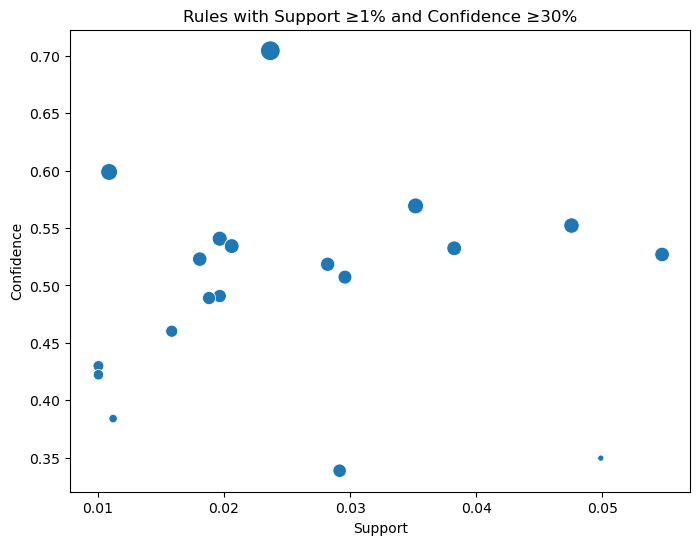

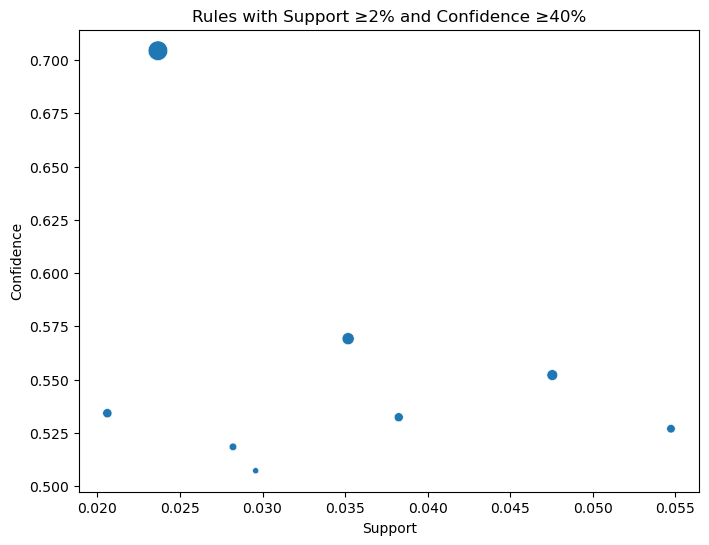

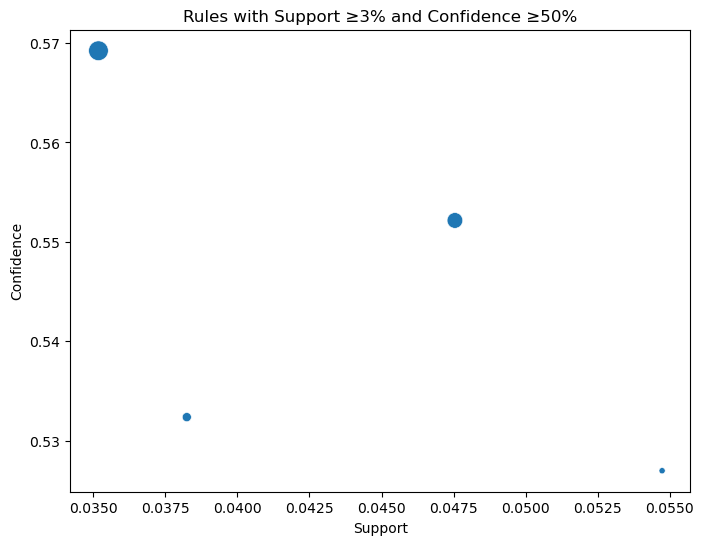

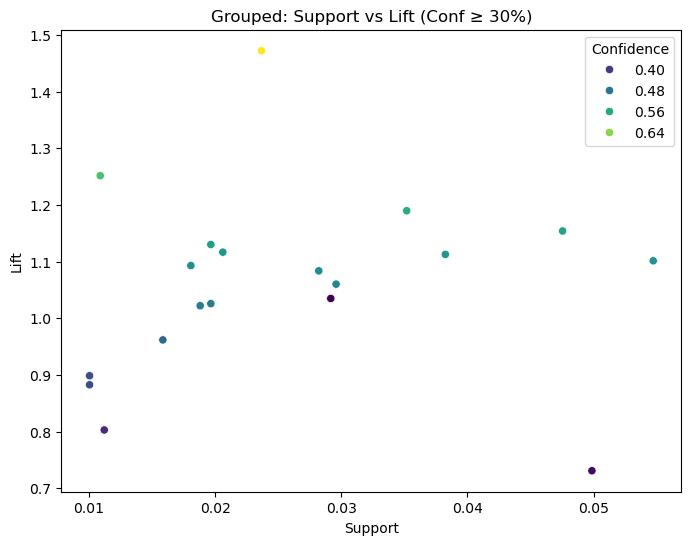

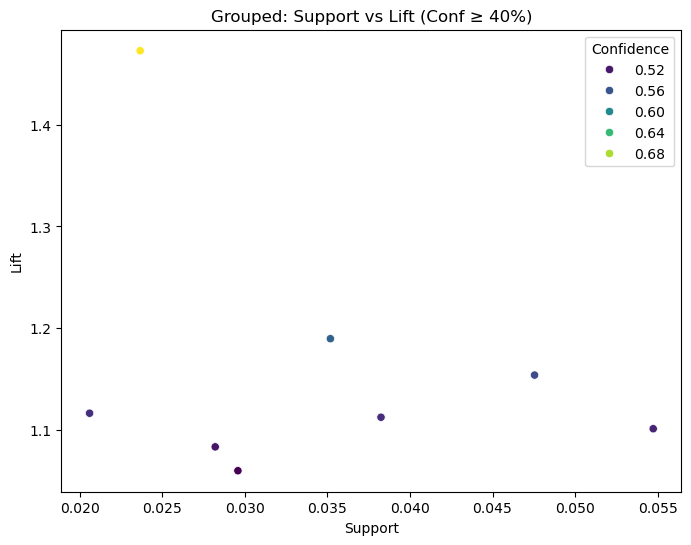

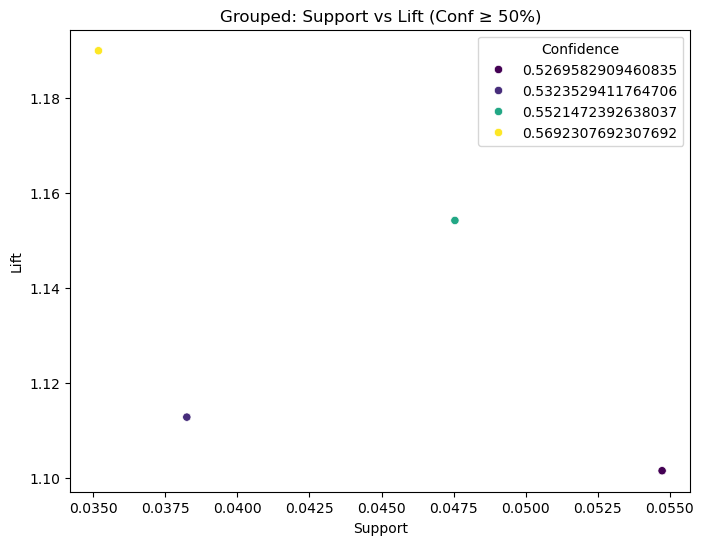

Rules (1%/30%) with length ≥5:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
Rules (2%/40%) with length ≥5:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
Rules (3%/50%) with length ≥5:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [41]:
# ---------------------- 6. Association Rule Mining ----------------------

# ● Choose a dataset of your choice having more than 500 purchase transactions and at least 10 different items.
# ● Use the Apriori algorithm to mine association rules with:
#   (a) Minimum support = 1% and confidence = 30%
#   (b) Minimum support = 2% and confidence = 40%
#   (c) Minimum support = 3% and confidence = 50%
# ● Display the first 5 rules in each of the above cases.
# ● Sort all rules based on "lift" and display the first 5 rules.
# ● Interpret the confidence value of any 2 rules obtained.
# ● Plot the rules.
# ● Plot the rules using the group method.
# ● Display the first 5 rules in each of the above cases with a minimum length of 5.
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/users/devansh/downloads/bake.csv')

# Group items by transaction
transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

def get_rules(min_support, min_confidence, min_len=1):
    frequent_items = apriori(df_trans, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_items, metric='confidence', min_threshold=min_confidence)
    rules = rules[rules['antecedents'].apply(lambda x: len(x) >= min_len)]
    return rules.sort_values(by='lift', ascending=False)

rules_1 = get_rules(min_support=0.01, min_confidence=0.3)
print(rules_1.head(5))

rules_1 = get_rules(min_support=0.01, min_confidence=0.3)
print(rules_1.head(5))

rules_2 = get_rules(min_support=0.02, min_confidence=0.4)
print(rules_2.head(5))

rules_3 = get_rules(min_support=0.03, min_confidence=0.5)
print(rules_3.head(5))

all_rules = pd.concat([rules_1, rules_2, rules_3])
top_lift = all_rules.sort_values(by='lift', ascending=False).drop_duplicates().head(5)
print(top_lift)

def plot_rules(rules, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 200))
    plt.title(title)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

plot_rules(rules_1, "Rules with Support ≥1% and Confidence ≥30%")
plot_rules(rules_2, "Rules with Support ≥2% and Confidence ≥40%")
plot_rules(rules_3, "Rules with Support ≥3% and Confidence ≥50%")

def plot_group(rules, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=rules, x='support', y='lift', hue='confidence', palette='viridis')
    plt.title(title)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.legend(title='Confidence')
    plt.show()

plot_group(rules_1, "Grouped: Support vs Lift (Conf ≥ 30%)")
plot_group(rules_2, "Grouped: Support vs Lift (Conf ≥ 40%)")
plot_group(rules_3, "Grouped: Support vs Lift (Conf ≥ 50%)")

rules_1_len5 = get_rules(min_support=0.01, min_confidence=0.3, min_len=5)
rules_2_len5 = get_rules(min_support=0.02, min_confidence=0.4, min_len=5)
rules_3_len5 = get_rules(min_support=0.03, min_confidence=0.5, min_len=5)

print("Rules (1%/30%) with length ≥5:\n", rules_1_len5.head(5))
print("Rules (2%/40%) with length ≥5:\n", rules_2_len5.head(5))
print("Rules (3%/50%) with length ≥5:\n", rules_3_len5.head(5))
